In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2 
import os

import numpy as np

In [10]:
labels = ['bengin', 'malignant','normal']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [12]:
#Now we can easily fetch our train and validation data.

train = get_data('C:/Users/USER/Desktop/FinalProjectLungCancer/lungcancer/train')
val = get_data('C:/Users/USER/Desktop/FinalProjectLungCancer/lungcancer/test')


C:\Users\USER\AppData\Local\Temp/ipykernel_5232/1846722391.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


Text(0.5, 1.0, 'bengin')

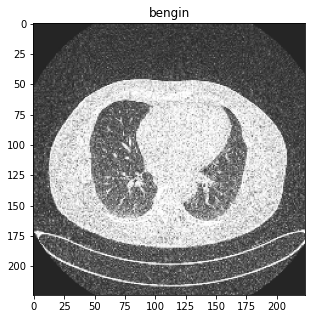

In [13]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

In [14]:
val[1][0].shape

(224, 224, 3)

Text(0.5, 1.0, 'normal')

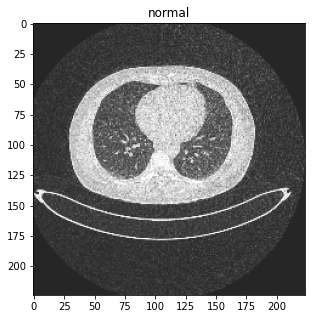

In [15]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [16]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [18]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(3, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

In [19]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 250 , validation_data = (x_val, y_val))


Epoch 1/250
31/31 [==============================] - 44s 1s/step - loss: 1.0799 - accuracy: 0.3936 - val_loss: 1.0765 - val_accuracy: 0.3548
Epoch 2/250
31/31 [==============================] - 41s 1s/step - loss: 1.0506 - accuracy: 0.4594 - val_loss: 1.0554 - val_accuracy: 0.4839
Epoch 3/250
31/31 [==============================] - 38s 1s/step - loss: 1.0304 - accuracy: 0.5057 - val_loss: 1.0389 - val_accuracy: 0.4839
Epoch 4/250
31/31 [==============================] - 40s 1s/step - loss: 1.0121 - accuracy: 0.5159 - val_loss: 1.0271 - val_accuracy: 0.4839
Epoch 5/250
31/31 [==============================] - 38s 1s/step - loss: 1.0021 - accuracy: 0.5118 - val_loss: 1.0193 - val_accuracy: 0.4839
Epoch 6/250
31/31 [==============================] - 39s 1s/step - loss: 0.9948 - accuracy: 0.5159 - val_loss: 1.0130 - val_accuracy: 0.4839
Epoch 7/250
31/31 [==============================] - 39s 1s/step - loss: 0.9871 - accuracy: 0.5231 - val_loss: 1.0077 - val_accuracy: 0.4839
Epoch 8/250
3

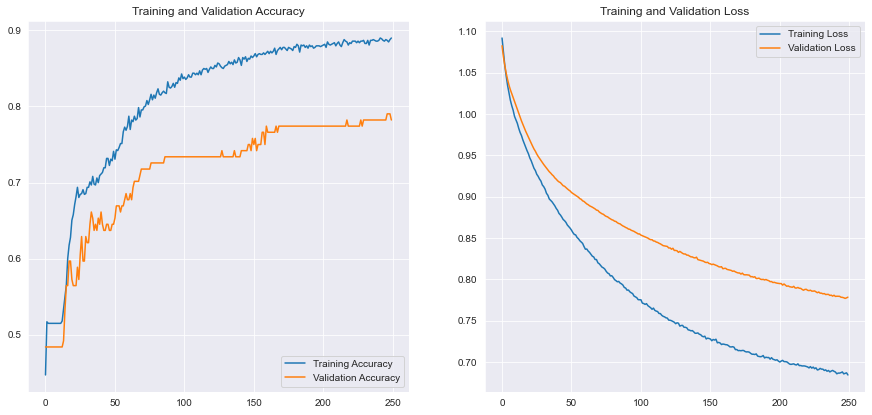

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(250)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['bengin (Class 0)','malignant (Class 1)','normal (Class 2)']))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
                     precision    recall  f1-score   support

   bengin (Class 0)       0.00      0.00      0.00        22
malignant (Class 1)       0.86      1.00      0.92        60
   normal (Class 2)       0.69      0.88      0.77        42

           accuracy                           0.78       124
          macro avg       0.51      0.63      0.56       124
       weighted avg       0.65      0.78      0.71       124



C:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
img_path="C:/Users/hp/Desktop/FinalProjectLungCancer/lungcancer/test/Malignant/Malignant case (2).jpg"
img_arr = cv2.imread(img_path)[...,::-1]
test_image = cv2.resize(img_arr, (img_size, img_size))
test_image = np.array(test_image).reshape(1, img_size, img_size, 3)

prediction = model.predict(test_image)

The Model predicted this image as:malignant


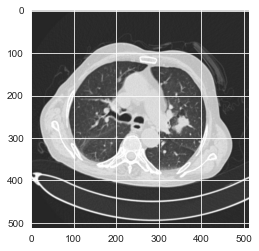

In [44]:
class_predicted=np.argmax(prediction)
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
if(class_predicted==0):
    print("The Model predicted this image as:Bengin")
if(class_predicted==1):
    print("The Model predicted this image as:malignant")
if(class_predicted==2):
    print("The Model predicted this image as:normal")


    
